# Análisis Catastro Minero Colombiano
Maestría Ciencias de Información y las Comunicaciones - Materia: Big Data.

Por: David Alonso Rueda Rodríguez - 20181395007 (daruedar@correo.udistrital.edu.co)

*Tema*: Análisis Exploratorio de datos

#### Objetivo de la actividad:

Caracterizar las variables consideradas para adelantar el análisis del Catastro Minero Colombiano

#### Fuente de datos:

Los datos se han descargado desde el Tablero de Control del Radicador de Solicitudes Mineras de la Agencia Nacional de Minería.

Link: https://radicador.anm.gov.co/radicador-report/public/TableroSolicitudes.jsf

#### Temas trabajados

A continuación, listado de actividades trabajadas en el pre-procesamiento de datos:
    
##### Pre-procesamiento
    1  Cargar Librerías
    2. Importar datos a pandas
    3. Preparación del grupo de datos
    4. Descripción de los datos
        4.1. Descripción variables numéricas
        4.2. Descripción variables categóricas
    5. Relaciones entre los datos
    
    [Enlace al Título](#idEncabezado1)
    
#### Listado de versiones

1.0.0 Preparación del documento.

## Pre-procesamiento
### 1. Cargar Librerías

Este proyecto utilizará las librerías pandas, seaborn, numpy y matplotlib.

In [2]:
# importat librerías de interés
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### 2. Importar datos con pandas
Se importará el archivo de datos descargado desde el repositorio de kaggle, en este caso se cargarán todos los datos para iniciar el pre-procesamiento con pandas.

In [3]:
# Importar archivo de entrenamiento
ent = pd.read_excel('../src/20181395007_ListadoPropuestas2018.xlsx')

In [4]:
# Visualización de datos cargados
ent.head(2)

,Fecha,Hora,Placa,Consecutivo,Orden_Dia,Tipo,Area_Normalizada,Mineral,Mineral Simplificado,Proponente,Primer_Departamento,Primer_Municipio,Porcentaje,Departamentos,Municipios,Participaciones,I
0,2018-01-02,9:6:46:693,TA2-09061,12524,2,Propuestas de Contratos de Concesión,45.08695,ARENAS Y GRAVAS NATURALES Y SILICEAS,Materiales de Construcción,ASOSERVICIOS EL MOTILON SAS,NORTE SANTANDER,TIBU,55.91142,"NORTE SANTANDER, NORTE SANTANDER","TIBU, EL TARRA","55.91142, 44.08857",I
1,2018-01-02,8:57:41:456,TA2-08571,12523,1,Propuestas de Contratos de Concesión,101.21230,"MATERIALES DE CONSTRUCCIÓN, RECEBO (MIG), GRA...",Materiales de Construcción,COMERCIALIZADOS INTERNACIONAL DE MINERALES SAS,CESAR,GAMARRA,100.00000,CESAR,GAMARRA,100,I


### 3. Preparación del grupo de datos

Esta actividad se realizó previamente en la fuente de datos utilizada. El pre-procesamiento fue el siguiente:

#### 3.0 Descripción de variables consideradas

In [5]:
ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 17 columns):
Fecha                   1885 non-null datetime64[ns]
Hora                    1885 non-null object
Placa                   1885 non-null object
Consecutivo             1885 non-null int64
Orden_Dia               1885 non-null int64
Tipo                    1885 non-null object
Area_Normalizada        1885 non-null float64
Mineral                 1885 non-null object
Mineral Simplificado    1885 non-null object
Proponente              1885 non-null object
Primer_Departamento     1885 non-null object
Primer_Municipio        1885 non-null object
Porcentaje              1885 non-null float64
Departamentos           1883 non-null object
Municipios              1883 non-null object
Participaciones         1883 non-null object
I                       1885 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(12)
memory usage: 250.4+ KB


Datos considerados y su descripción:

|Datos Numéricos  | Descripción |
|--|--|
|Area_Normalizada| Área solicitada por cada propuesta de concesión|


|Datos Categóricos  | Descripción |
|--|--|
|Fecha  | Fecha de presentación de la propuesta|
|Hora   | Hora de presentación de la propuesta |
|Placa  | Identificador asignado a la propuesta |
|Consecutivo  | Número acumulativo con identificador de la propuesta |
|Orden_Dia  | Consecutivo de la propuesta |
|Mineral  | Tipo de mineral de la propuesta |
|Mineral Simplificado  | Tipo de mineral agrupado para facilitar interpretación |
|Proponente  | Nombre de la compañía que propone el contrato de concesión |
|Primer_Departamento  | Nombre del Departamento que se superpone con mayor área |
|Primer_Municipio  | Nombre del Municipio con mayor superposición en área|
|Porcentaje  | Porcentaje de área que ocupa del primer municipio en la propuesta |
|Departamentos  | Departamentos de la propuesta |
|Municipios  | Municipios de la propuesta |
|Participaciones  | Porcentajes de participación por cada propuesta |
|Datos Categóricos  | Descripción |

#### 3.1 Agrupamiento de datos en 5 grupos

- Metales Base (Cobre, Plata, Oro, Platino, Zinc, Hierro y Niquel)
- Piedras Preciosas (Esmeraldas)
- Carbón (Carbón) y Otros (Abonos, feldespatos, roca fosfórica)
- Materiales de construcción (Arcillas, Arenas, Materiales de construcción y calizas)

In [6]:
ent['Mineral Simplificado'].isnull().sum()

0

Se han encontrado cerca de 55 grupos de minerales para un análisis sobre esta variable se hace sumamente complejo, por tal motivo se han clasificado en 5grupos previamente descritos

In [7]:
ent['Mineral Simplificado'].value_counts()

Materiales de Construcción    984
Metales Base                  559
Carbón                        178
Piedras Preciosas             129
Otro                           25
Otros                          10
Name: Mineral Simplificado, dtype: int64

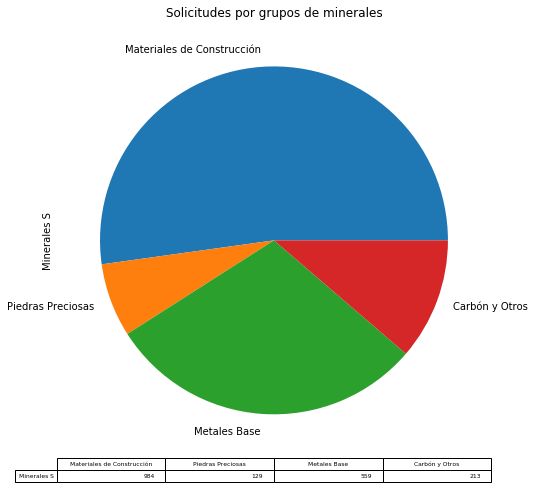

In [8]:
sur = pd.DataFrame({'Minerales S':[984, 129, 559, 213]}, index=['Materiales de Construcción','Piedras Preciosas','Metales Base', 'Carbón y Otros'])
plot2 = sur.plot.pie(y='Minerales S', legend=False, title="Solicitudes por grupos de minerales", table=True, figsize=(8,8))

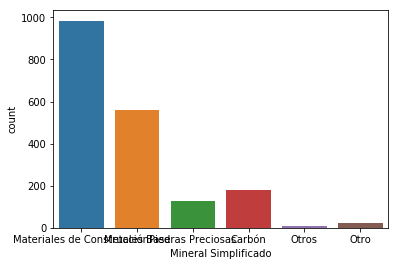

In [9]:
# Generación de gráfico de barras para valores considerados categóricos
datos_categoricos = ent[['Mineral Simplificado', 'Proponente', 'Hora', 'Primer_Departamento', 'Primer_Municipio']]
sns.countplot(data = datos_categoricos, x = 'Mineral Simplificado')

Las propuestas mineras analizadas entre Enero 01 de 2018 y Marzo 31 de 2019 presentan una alta dinámica para materiales de construcción con la mayor participación de las propuestas con un **52%**, seguido por los metales base con un **30%**, el Carbón y otros con un 11% y Piedras Preciosas con el 7%.

La gran mayoría de la minería en el país se hace para satisfacer la necesidad de materiales para construcción de casa, edificaciones y obras de infraestructura.

#### 3.2 Normalización de las áreas
Se han transformado los datos de área a unidades de hectáreas, porque algunos datos se expresaban en metros cuadrados.
#### 3.3 Segmentación de fechas

Las fechas serán segmentadas en paquetes de 2 horas, los grupos establecidos son los siguientes:

|Horas|Rango|
|--|--|
|08-09|1|
|10-11|2|
|12-13|3|
|14-15|4|
|16-17|5|

Se inicia a las 8.00 porque a esa hora abre el Catastro Minero para presentación de solicitudes y finaliza atención a las 17.00

Para lograr esto se creará el campo **'Hora_segm'**, para esto es necesario crear la función asignarHorario

In [66]:
# Definición de Función para asignación de códigos de hora
def asignarHorario(hora):
    """ Esta función utiliza una progresión numérica para estimar el resultado de la categorización"""
    # Import de la librería math el función floor
    from math import floor
    # define el límite de la cadena de texto
    limite = hora.find(":")
    # extrae la cadena de texto necesaria y la convierte en número
    hora2 = int(hora[0:limite])
    # Asigna  la respectiva categoría utilizado el resultado de la progresión numérica
    # d = Salto numérico
    # n = indice de cambio n=[0,inf)
    # a_1 = valor de salida
    # a_n = a_1 + d*(n-1)
    categoria = 1+((hora2-8)/2)
    # Valor entero aproximado al menor valor
    return floor(categoria)

In [68]:
# Este ciclo visita todos los elementos del DataFrame, le envía los datos
#  y hace asignacioń a un array de los resultados
horario = np.array([asignarHorario(hora) for hora in ent['Hora'].values])
# Asigna al campo Hora_segm los valores del vector estimado
ent = ent.assign(Hora_segm = horario)
# Muestra el resultado del nuevo valor
ent[['Placa', 'Hora', 'Hora_segm']][10:20]

,Placa,Hora,Hora_segm
10,TA4-14451,14:45:32:294,4
11,TA4-09251,9:25:1:374,1
12,TA5-16441,16:44:22:921,5
13,TA5-16131,16:13:23:285,5
14,TA9-10551,10:55:33:262,2
15,TA9-08091,8:9:7:343,1
16,TA9-08021,8:2:18:108,1
17,TA9-08001,8:0:28:575,1
18,TAA-16001,16:0:27:59,5
19,TAA-14561,14:56:28:821,4


In [27]:
ent['Hora'][2][0:a]


Cadena de texto: 11:3:32:947, valor encontrado: 2


'11'

#### 3.4 Datos nulos

Se observa que únicamente se tienen 2 propuestas con datos nulos

In [10]:
ent.isnull().sum()

Fecha                   0
Hora                    0
Placa                   0
Consecutivo             0
Orden_Dia               0
Tipo                    0
Area_Normalizada        0
Mineral                 0
Mineral Simplificado    0
Proponente              0
Primer_Departamento     0
Primer_Municipio        0
Porcentaje              0
Departamentos           2
Municipios              2
Participaciones         2
I                       0
dtype: int64

#### 3.5. Revisión Datos numéricos

El principal campo a analizar es el "Área Normalizada"

In [11]:
ent['Area_Normalizada'].describe()

count     1885.000000
mean      1113.666794
std       2086.065981
min          0.000000
25%         48.662900
50%        183.398700
75%       1175.000000
max      10000.000000
Name: Area_Normalizada, dtype: float64

Una nueva pregunta a partir de estos datos se relaciona con el tamaño de la minería que se proyecta para el país, aunque en los últimos años se ha puesto en conocimiento de la opinión pública temas sobre grandes proyectos mineros, la realidad que vive el país es una solicitud constante de áreas consideradas como pequeña y mediana minería.

Se hace evidente porque la media de las solicitudes está fijada en 1113.667 hectáreas, que según decretos relacionados con la exploración minera son considerados mediana minería (**Agregar decreto**).

In [12]:
ent['Area_Normalizada'].isnull().sum()

0

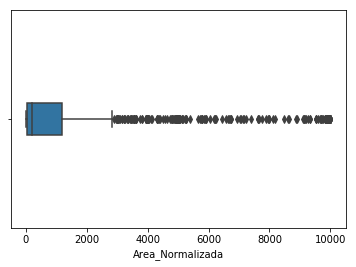

In [13]:
plot = sns.boxplot(x=ent['Area_Normalizada'], orient="h", width=0.15)

### 4. Descripción de los datos
#### 4.1 Descripción variables numéricas

El campo de Area_Normalizada es un campo en el cual todos los datos se han expresado en unidades de hectáreas. Con el gráfico el siguiente histograma se identifica que la exploración los meses analizados se presenta principalmente en área de exploración pequeñas asociadas a pequeña minería.

Después de lo anterior es posible concluir que la actividad de exploración se ha principalmente para pequeña y mediana mineria.

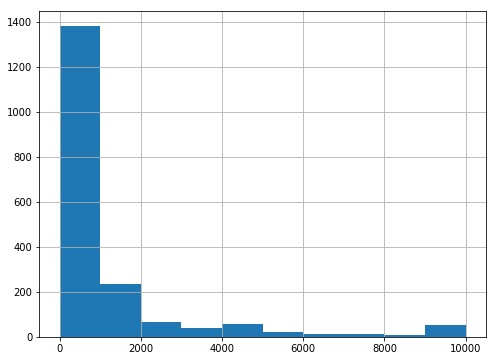

In [14]:
# Comportamiento de los datos normalizados de área
ent['Area_Normalizada'].hist(figsize=(8,6))